<a href="https://colab.research.google.com/github/immy78/Deep_Learning/blob/master/Google_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
from google.colab import files
uploaded = files.upload()

Saving GOOG.csv to GOOG (1).csv


In [72]:
data = pd.read_csv('GOOG.csv')

In [73]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


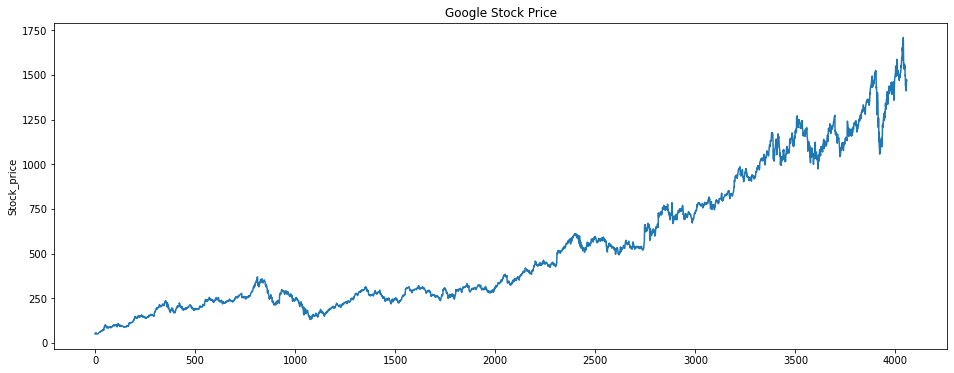

In [74]:
fig = plt.figure(figsize=((16,6)))
plt.plot(data['Open'])
plt.ylabel('Stock_price')
plt.title('Google Stock Price');


In [75]:
data.shape

(4057, 7)

In [76]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4052,2020-09-23,1458.780029,1460.959961,1407.699951,1415.209961,1415.209961,1657400
4053,2020-09-24,1411.030029,1443.708984,1409.849976,1428.290039,1428.290039,1450200
4054,2020-09-25,1432.630005,1450.000000,1413.339966,1444.959961,1444.959961,1323000
4055,2020-09-28,1474.209961,1476.800049,1449.301025,1464.520020,1464.520020,2007900
4056,2020-09-29,1470.390015,1476.662964,1458.805054,1469.329956,1469.329956,978200


In [77]:
last_2_month_data = data[data['Date']>'2020-07-31']
last_2_month_data.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
4016,2020-08-03,1486.640015,1490.469971,1465.640015,1474.449951,1474.449951,2330200
4017,2020-08-04,1476.569946,1485.560059,1458.650024,1464.969971,1464.969971,1903500


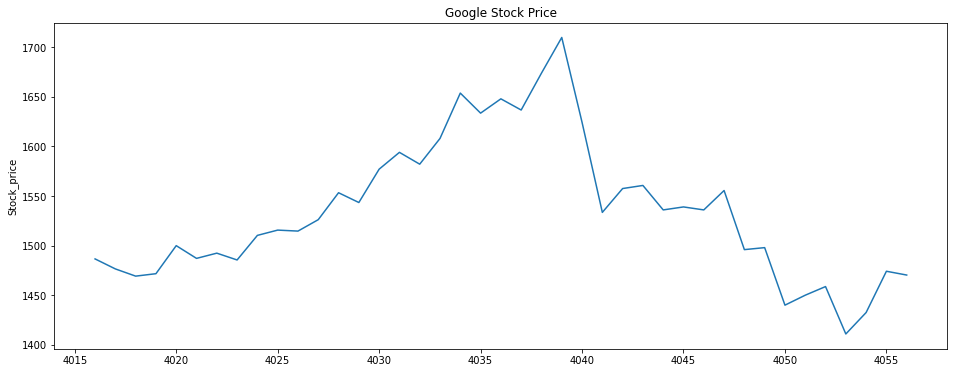

In [78]:
fig = plt.figure(figsize=((16,6)))
plt.plot(last_2_month_data['Open'])
plt.ylabel('Stock_price')
plt.title('Google Stock Price');

In [79]:
data_training = data[data['Date']<'2020-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3864,2019-12-24,1348.500000,1350.260010,1342.780029,1343.560059,1343.560059,347500
3865,2019-12-26,1346.170044,1361.327026,1344.469971,1360.400024,1360.400024,667500
3866,2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
3867,2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900


In [80]:
data_test = data[data['Date']>='2020-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3869,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
3870,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
3871,2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
3872,2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
3873,2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000
...,...,...,...,...,...,...,...
4052,2020-09-23,1458.780029,1460.959961,1407.699951,1415.209961,1415.209961,1657400
4053,2020-09-24,1411.030029,1443.708984,1409.849976,1428.290039,1428.290039,1450200
4054,2020-09-25,1432.630005,1450.000000,1413.339966,1444.959961,1444.959961,1323000
4055,2020-09-28,1474.209961,1476.800049,1449.301025,1464.520020,1464.520020,2007900


In [81]:
training_data = data_training.drop(['Date','Adj Close'],axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700
4,52.284027,53.798351,51.746044,52.802086,9232100


In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [83]:
training_data = scaler.fit_transform(training_data)
training_data

array([[3.07080191e-04, 8.79291979e-04, 0.00000000e+00, 1.25356905e-04,
        5.43577404e-01],
       [6.89986513e-04, 2.78189186e-03, 1.73314228e-03, 3.15285500e-03,
        2.77885613e-01],
       [4.38255570e-03, 4.44951014e-03, 4.99709621e-03, 3.56690484e-03,
        2.22150736e-01],
       ...,
       [9.99726026e-01, 9.99642423e-01, 9.97425041e-01, 9.92923311e-01,
        1.24858240e-02],
       [9.89839738e-01, 9.90869803e-01, 9.85707361e-01, 9.80912804e-01,
        1.26372774e-02],
       [9.74702051e-01, 9.79457057e-01, 9.81925328e-01, 9.81583871e-01,
        1.15577171e-02]])

In [84]:
training_data.shape

(3869, 5)

In [85]:
x_train = []
y_train = []

for i in range(60,training_data.shape[0]):
  x_train.append(training_data[i-60:i])
  y_train.append(training_data[i,0])


#Now converting this list to array

In [86]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train.shape , y_train.shape

((3809, 60, 5), (3809,))

## Build LSTM(Long Term Short Term Memory)

In [87]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM , Dense, Dropout

In [88]:
x_train.shape[1],5

(60, 5)

In [89]:
regressor = Sequential()

regressor.add(LSTM(units = 50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 70,activation='relu',return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 100,activation='relu',return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 120,activation='relu'))
regressor.add(Dropout(0.4))

regressor.add(Dense(units=1))

In [90]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 70)            33880     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 70)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 100)           68400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 100)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 120)              

In [91]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [92]:
regressor.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
120/120 [==============================] - 37s 311ms/step - loss: 0.0182
Epoch 2/50
120/120 [==============================] - 37s 310ms/step - loss: 0.0042
Epoch 3/50
120/120 [==============================] - 38s 314ms/step - loss: 0.0040
Epoch 4/50
120/120 [==============================] - 38s 313ms/step - loss: 0.0031
Epoch 5/50
120/120 [==============================] - 37s 309ms/step - loss: 0.0033
Epoch 6/50
120/120 [==============================] - 37s 310ms/step - loss: 0.0032
Epoch 7/50
120/120 [==============================] - 37s 310ms/step - loss: 0.0036
Epoch 8/50
120/120 [==============================] - 37s 308ms/step - loss: 0.0026
Epoch 9/50
120/120 [==============================] - 37s 309ms/step - loss: 0.0022
Epoch 10/50
120/120 [==============================] - 37s 311ms/step - loss: 0.0021
Epoch 11/50
120/120 [==============================] - 38s 315ms/step - loss: 0.0021
Epoch 12/50
120/120 [==============================] - 37s 308ms/step - lo

## Preparing test dataset

In [93]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3869,2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
3870,2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
3871,2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
3872,2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
3873,2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000


In [94]:
past_60_days= data_training.tail(60)

In [95]:
df = past_60_days.append(data_test, ignore_index=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-07,1204.400024,1218.203979,1203.750000,1207.680054,1207.680054,842900
1,2019-10-08,1197.589966,1206.079956,1189.010010,1189.130005,1189.130005,1039300
2,2019-10-09,1199.349976,1208.349976,1197.630005,1202.310059,1202.310059,867700
3,2019-10-10,1198.579956,1215.000000,1197.339966,1208.670044,1208.670044,846600
4,2019-10-11,1222.209961,1228.390015,1213.739990,1215.449951,1215.449951,1272700
...,...,...,...,...,...,...,...
243,2020-09-23,1458.780029,1460.959961,1407.699951,1415.209961,1415.209961,1657400
244,2020-09-24,1411.030029,1443.708984,1409.849976,1428.290039,1428.290039,1450200
245,2020-09-25,1432.630005,1450.000000,1413.339966,1444.959961,1444.959961,1323000
246,2020-09-28,1474.209961,1476.800049,1449.301025,1464.520020,1464.520020,2007900


In [96]:
df = df.drop(['Date','Adj Close'],axis =1)
df.head()

,Open,High,Low,Close,Volume
0,1204.400024,1218.203979,1203.750000,1207.680054,842900
1,1197.589966,1206.079956,1189.010010,1189.130005,1039300
2,1199.349976,1208.349976,1197.630005,1202.310059,867700
3,1198.579956,1215.000000,1197.339966,1208.670044,846600
4,1222.209961,1228.390015,1213.739990,1215.449951,1272700


In [97]:
inputs = scaler.transform(df)
inputs

array([[0.87902801, 0.88831029, 0.88587359, 0.88295285, 0.01011709],
       [0.87384509, 0.87908573, 0.87457744, 0.8688071 , 0.01249673],
       [0.87518458, 0.88081287, 0.88118346, 0.87885784, 0.01041758],
       ...,
       [1.05272693, 1.06467223, 1.04649502, 1.06389584, 0.01593412],
       [1.08437217, 1.08506304, 1.07405415, 1.07881179, 0.02423255],
       [1.08146493, 1.08495874, 1.08133766, 1.08247971, 0.01175642]])

In [98]:
inputs.shape

(248, 5)

In [99]:
x_test = []
y_test = []

for i in range (60,inputs.shape[0]):
  x_test.append(inputs[i-60:i])
  y_test.append(inputs[i,0])

In [100]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [101]:
x_test.shape , y_test.shape

((188, 60, 5), (188,))

In [102]:
y_pred = regressor.predict(x_test)
y_pred

array([[0.94882894],
       [0.9494113 ],
       [0.9499732 ],
       [0.950701  ],
       [0.9518392 ],
       [0.95349634],
       [0.9557513 ],
       [0.9586042 ],
       [0.9619807 ],
       [0.9657233 ],
       [0.9696555 ],
       [0.9737036 ],
       [0.9779284 ],
       [0.9824027 ],
       [0.98714864],
       [0.99206805],
       [0.9969275 ],
       [1.0012676 ],
       [1.0048528 ],
       [1.0078396 ],
       [1.0103312 ],
       [1.0123559 ],
       [1.0141146 ],
       [1.015692  ],
       [1.0170094 ],
       [1.0182251 ],
       [1.0195069 ],
       [1.0210109 ],
       [1.0229112 ],
       [1.0252593 ],
       [1.027959  ],
       [1.0308748 ],
       [1.033895  ],
       [1.0369668 ],
       [1.0400159 ],
       [1.0428311 ],
       [1.0449398 ],
       [1.045826  ],
       [1.045451  ],
       [1.0437732 ],
       [1.0405958 ],
       [1.0361854 ],
       [1.0311061 ],
       [1.0257071 ],
       [1.0201259 ],
       [1.0141141 ],
       [1.0072228 ],
       [0.999

In [103]:
scaler.scale_

array([7.61069658e-04, 7.60849739e-04, 7.66360329e-04, 7.62571888e-04,
       1.21162775e-08])

In [104]:
scale = 1/7.61069658e-04
scale

1313.940175499678

In [105]:
y_pred = y_pred*scale
y_test = y_test*scale

In [106]:
y = y_test
y_bar = y_pred

In [107]:
df1 = pd.DataFrame(y)
df2 = pd.DataFrame(y_bar)

df3 =pd.concat([df1,df2],axis=1)
df3.columns = ['Actual_Value','predicted_value']
df3

,Actual_Value,predicted_value
0,1292.140248,1246.704468
1,1298.450184,1247.469604
2,1300.590199,1248.208008
3,1348.530141,1249.164307
4,1342.670156,1250.659790
...,...,...
183,1409.370229,1455.188599
184,1361.620229,1450.110352
185,1383.220205,1444.086670
186,1424.800161,1437.391479


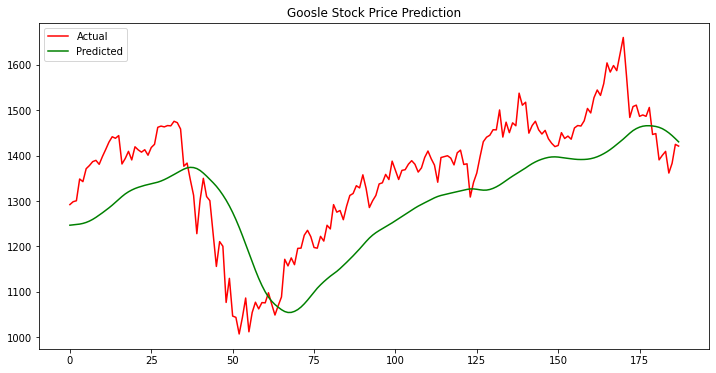

In [108]:
fig = plt.figure(figsize=(12,6))
plt.plot(y_test,color = 'red')
plt.plot(y_pred,color = 'green')
plt.legend(['Actual','Predicted'])
plt.title('Goosle Stock Price Prediction')
plt.show()